In [10]:
import pandas as pd
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [11]:
train = pd.read_csv('resources/train.csv')
test = pd.read_csv('resources/test.csv')
sampleSubmission = pd.read_csv('resources/sample_submission.csv')

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
sampleSubmission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [15]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
train.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: ylabel='count'>

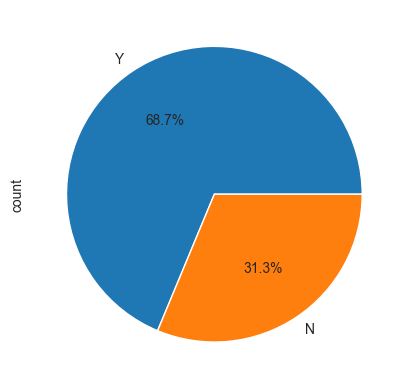

In [18]:
train.Loan_Status.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [19]:
sampleSubmission['Loan_Status'].value_counts()

Loan_Status
N    367
Name: count, dtype: int64

In [20]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [21]:
submission_N = sampleSubmission

In [22]:
submission_N

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [23]:
submission_N.to_csv('resources/submission_N.csv', index = False)

In [24]:
sampleSubmission['Loan_Status'] = 'Y'

In [25]:
sampleSubmission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [26]:
submission_Y = sampleSubmission

In [27]:
submission_Y

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [28]:
submission_Y.to_csv('resources/submission_Y.csv', index = False)

In [29]:
sampleSubmission['Loan_Status'] ='N'

# EDA - Exploratory Data Analysis

<Axes: xlabel='Loan_Status', ylabel='count'>

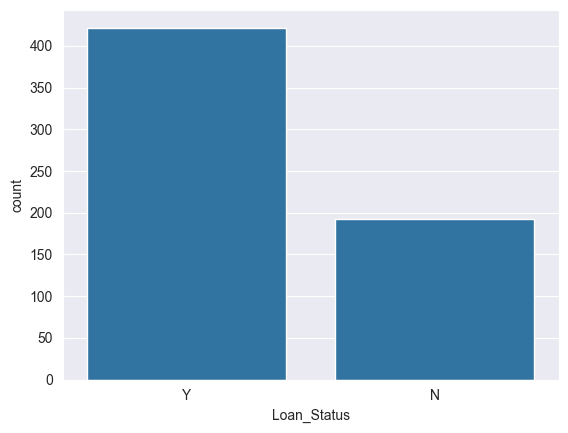

In [30]:
sns.countplot(x = 'Loan_Status', data = train)

In [31]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

[Text(0, 0, '422'), Text(0, 0, '192')]

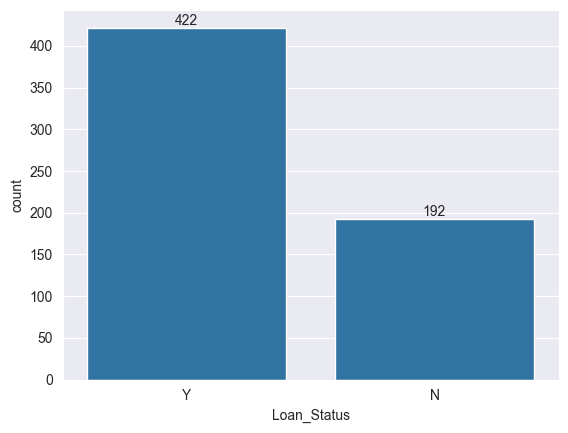

In [32]:
ax = sns.countplot(x = 'Loan_Status', data = train)
ax.bar_label(ax.containers[0])

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

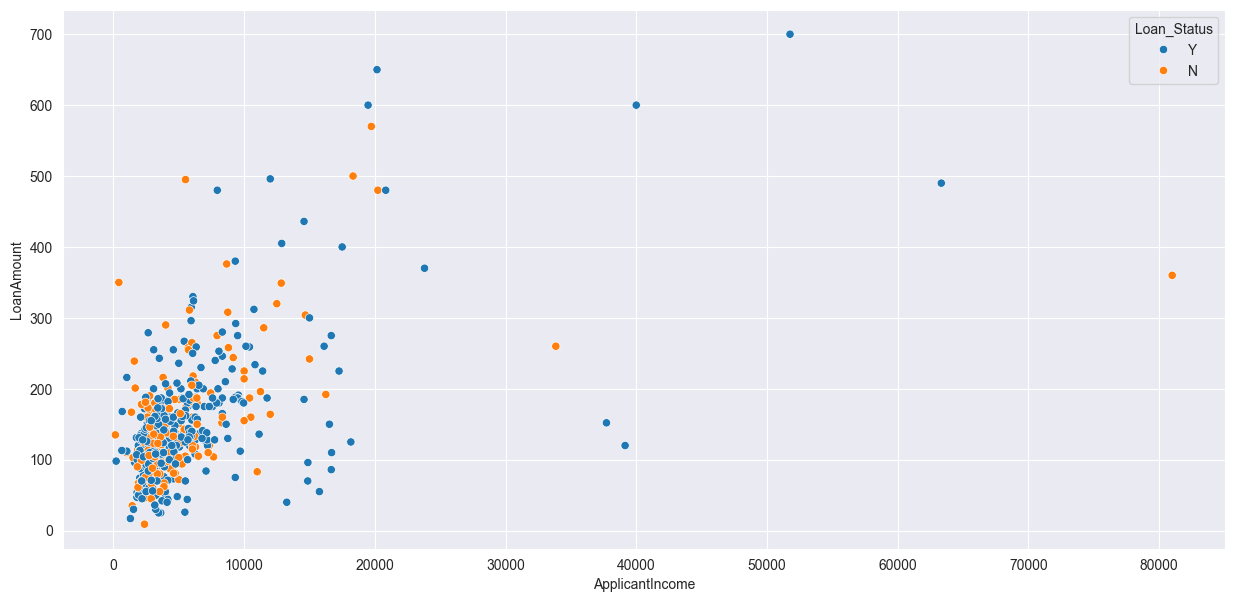

In [33]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', data = train, hue = 'Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

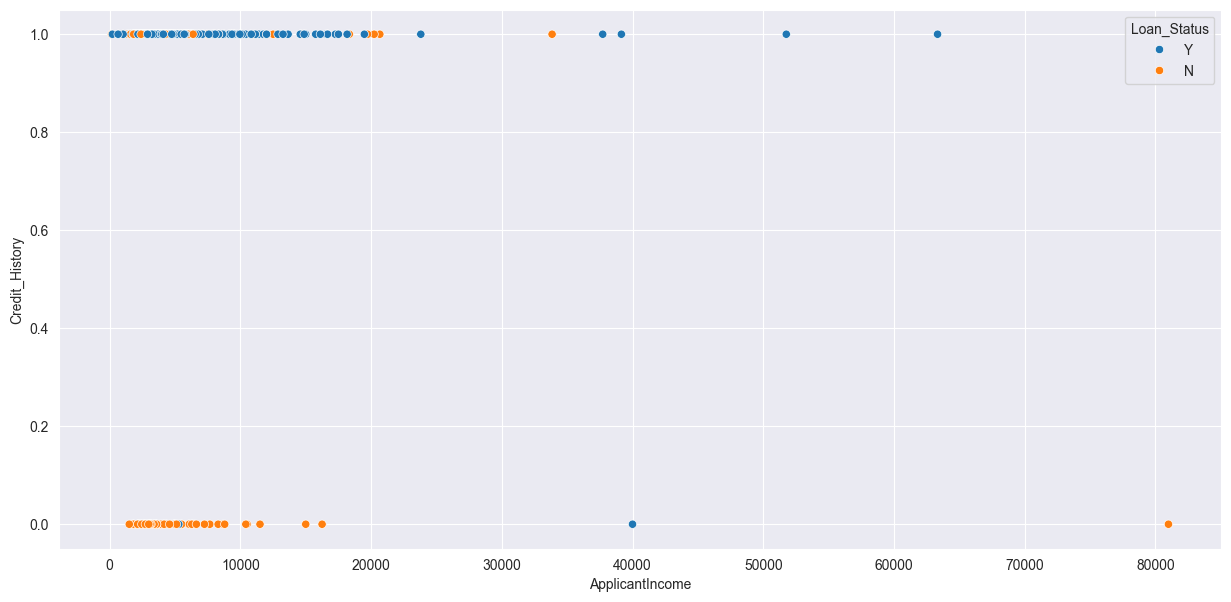

In [34]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'ApplicantIncome', y = 'Credit_History', data = train, hue = 'Loan_Status')

In [35]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Loan_Status'>

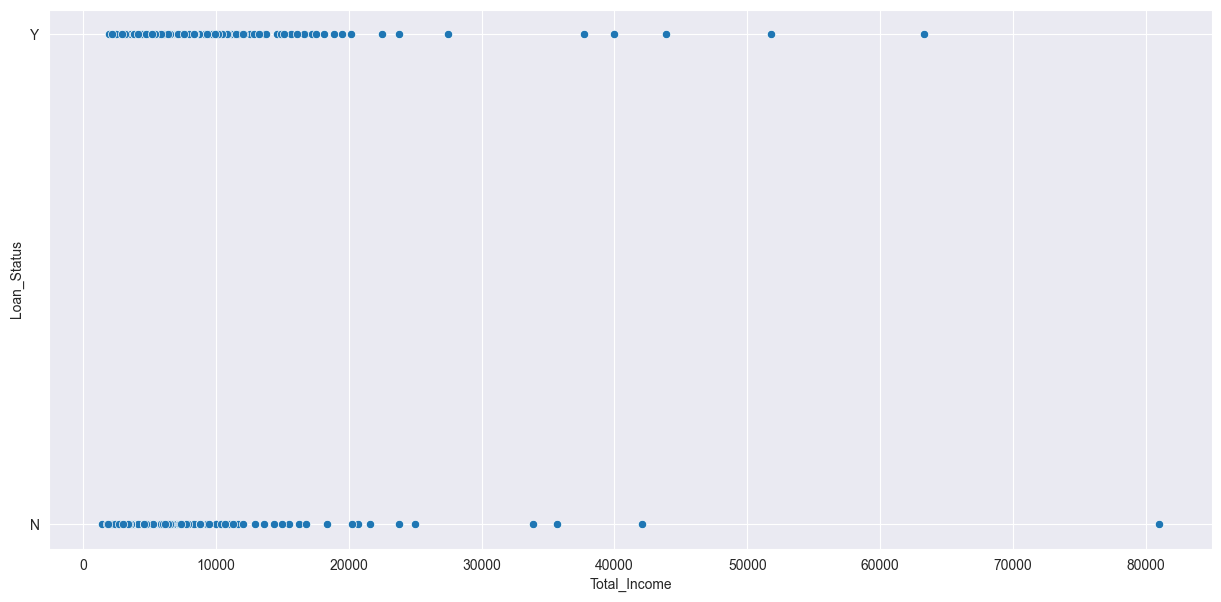

In [36]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Total_Income', y = 'Loan_Status', data = train)

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='Total_Income', ylabel='Self_Employed'>

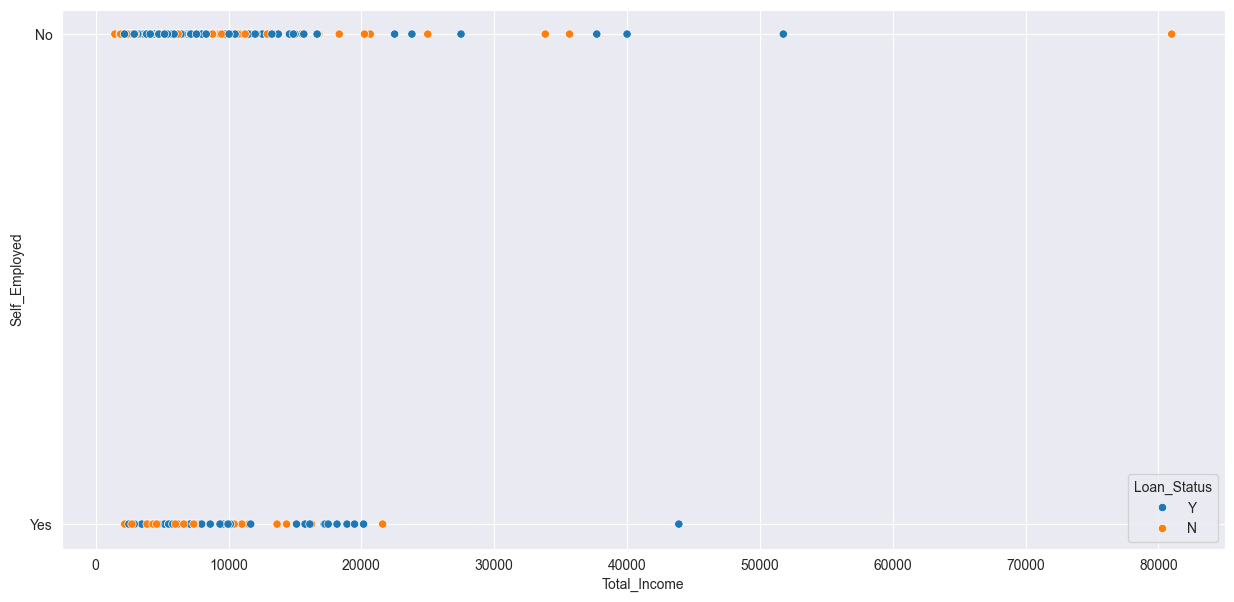

In [38]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'Total_Income', y = 'Self_Employed',data = train, hue = 'Loan_Status')

In [39]:
train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: proportion, dtype: float64

In [40]:
train.groupby('Married')['Loan_Status'].value_counts(normalize=True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: proportion, dtype: float64

In [41]:
train.groupby(['Education','Married'])['Loan_Status'].value_counts(normalize=True)

Education     Married  Loan_Status
Graduate      No       Y              0.630952
                       N              0.369048
              Yes      Y              0.747573
                       N              0.252427
Not Graduate  No       Y              0.622222
                       N              0.377778
              Yes      Y              0.606742
                       N              0.393258
Name: proportion, dtype: float64

In [42]:
train.groupby(['Education','Married', 'Property_Area'])['Loan_Status'].value_counts(normalize=True)

Education     Married  Property_Area  Loan_Status
Graduate      No       Rural          Y              0.608696
                                      N              0.391304
                       Semiurban      Y              0.666667
                                      N              0.333333
                       Urban          Y              0.610169
                                      N              0.389831
              Yes      Rural          Y              0.658824
                                      N              0.341176
                       Semiurban      Y              0.819672
                                      N              0.180328
                       Urban          Y              0.735294
                                      N              0.264706
Not Graduate  No       Rural          Y              0.588235
                                      N              0.411765
                       Semiurban      Y              0.823529
                    

In [43]:
train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize=True)

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: proportion, dtype: float64

In [44]:
train.groupby(['Gender'])['Loan_Status'].value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: proportion, dtype: float64

In [45]:
train.groupby(['Gender','Education','Married', 'Property_Area'])['Loan_Status'].value_counts()

Gender  Education     Married  Property_Area  Loan_Status
Female  Graduate      No       Rural          Y              10
                                              N               5
                               Semiurban      Y              17
                                              N              11
                               Urban          Y              15
                                              N               8
                      Yes      Rural          N               3
                               Semiurban      Y              16
                               Urban          N               4
                                              Y               2
        Not Graduate  No       Rural          N               2
                                              Y               2
                               Semiurban      Y               5
                                              N               1
                               Urban          

In [46]:
grouped = train.groupby(['Gender','Education','Married', 'Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()
grouped

Loan_Status                                       N         Y
Gender Education    Married Property_Area                    
Female Graduate     No      Rural          0.333333  0.666667
                            Semiurban      0.392857  0.607143
                            Urban          0.347826  0.652174
                    Yes     Rural          1.000000       NaN
                            Semiurban           NaN  1.000000
                            Urban          0.666667  0.333333
       Not Graduate No      Rural          0.500000  0.500000
                            Semiurban      0.166667  0.833333
                            Urban          0.500000  0.500000
                    Yes     Rural               NaN  1.000000
                            Semiurban      0.250000  0.750000
Male   Graduate     No      Rural          0.419355  0.580645
                            Semiurban      0.303030  0.696970
                            Urban          0.400000  0.600000
                    Yes     Rural          0.316456  0.683544
                            Semiurban      0.196078  0.803922
                            Urban          0.244681  0.755319
       Not Graduate No      Rural          0.384615  0.615385
                            Semiurban      0.181818  0.818182
                            Urban          0.714286  0.285714
                    Yes     Rural          0.500000  0.500000
                            Semiurban      0.280000  0.720000
                            Urban          0.413793  0.586207

<Axes: xlabel='Loan_Status', ylabel='Gender-Education-Married-Property_Area'>

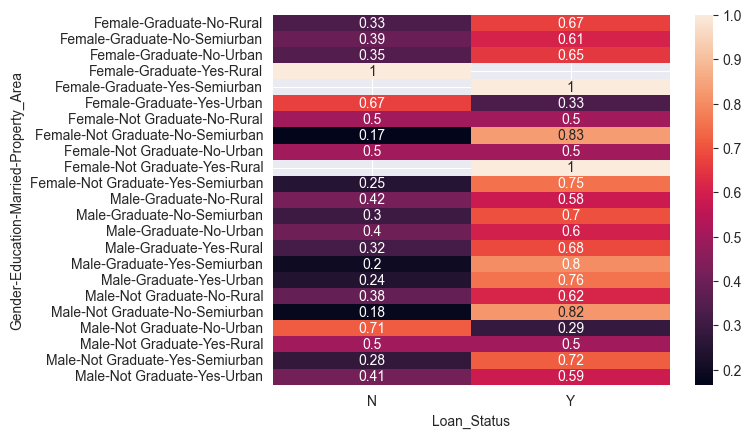

In [47]:
sns.heatmap(grouped, cbar = True, annot = True)

<Figure size 4000x1000 with 0 Axes>

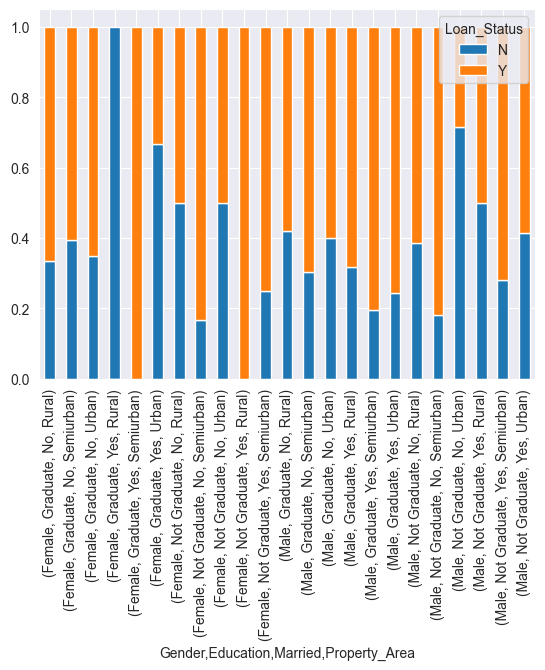

In [48]:
plt.figure(figsize = (40, 10))
grouped = train.groupby(['Gender','Education','Married', 'Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()
grouped.plot(kind = 'bar', stacked = True)
plt.show()

In [49]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [50]:
train.groupby(['Credit_History','Education','Married', 'Property_Area'])['Loan_Status'].value_counts(normalize=True).unstack()

Loan_Status                                               N         Y
Credit_History Education    Married Property_Area                    
0.0            Graduate     No      Rural          0.857143  0.142857
                                    Semiurban      0.833333  0.166667
                                    Urban          1.000000       NaN
                            Yes     Rural          0.923077  0.076923
                                    Semiurban      0.916667  0.083333
                                    Urban          0.916667  0.083333
               Not Graduate No      Rural          1.000000       NaN
                                    Urban          1.000000       NaN
                            Yes     Rural          1.000000       NaN
                                    Semiurban      0.833333  0.166667
                                    Urban          1.000000       NaN
1.0            Graduate     No      Rural          0.305556  0.694444
                                    Semiurban      0.204082  0.795918
                                    Urban          0.304348  0.695652
                            Yes     Rural          0.230769  0.769231
                                    Semiurban      0.088235  0.911765
                                    Urban          0.177215  0.822785
               Not Graduate No      Rural          0.375000  0.625000
                                    Semiurban      0.133333  0.866667
                                    Urban          0.400000  0.600000
                            Yes     Rural          0.350000  0.650000
                                    Semiurban      0.105263  0.894737
                                    Urban          0.250000  0.750000

In [51]:
train.Loan_Status.replace({'Y':1, 'N':0}, inplace=True)

<Axes: >

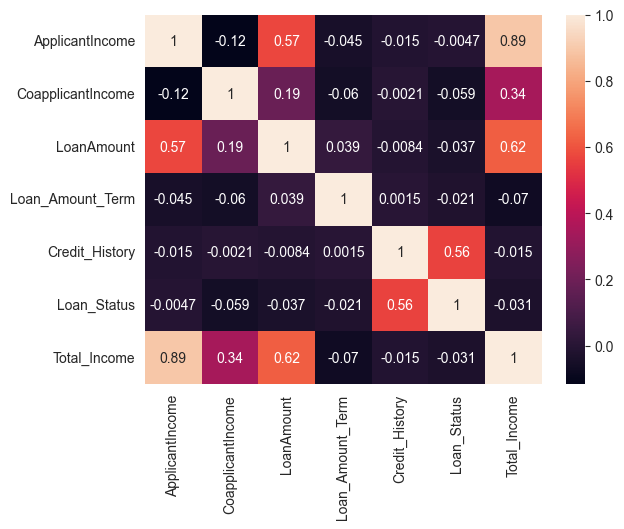

In [52]:
sns.heatmap(train.select_dtypes(np.number).corr(), annot = True)

In [53]:
# Preprocessing Data

In [54]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [55]:
y = train['Loan_Status']

In [56]:
X = train.drop(columns = ['Loan_ID', 'Loan_Status','Total_Income'])

In [57]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [58]:
y.name

'Loan_Status'

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .3, random_state = 42)

In [60]:
train.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [61]:
categorical_features = ['Gender', 'Education', 'Married', 'Dependents', 'Property_Area', 'Credit_History']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#1. Pipeline for numerical_features

    a. meadian imputer
    b. standard scaler

#2. Pipeline for categorical_features

    a. most_frequent imputer
    b. one hot encoder

#3. ColumnTransformer with 2 pipeline

    preprocess = Pipeline for numerical_features + Pipeline for categorical_features

#4. model_pipeline

    #ColumnTransformer
        a. preprocess
        b. Logistic Rgression

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [63]:
numerical_transformer = Pipeline(
steps = [('imputer',SimpleImputer(strategy='median')),
('scaler',StandardScaler())])

categorical_transformer = Pipeline(
steps = [('imputer',SimpleImputer(strategy='most_frequent')),
('onehot',OneHotEncoder())])

In [64]:
preprocessor = ColumnTransformer(
transformers = [
    ('num_trans',numerical_transformer,numerical_features),
    ('cat_trans',categorical_transformer,categorical_features)
]
)

In [65]:
preprocessor

,transformers,"[('num_trans', ...), ('cat_trans', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [66]:
model_preprocessor = Pipeline(
    steps = [
        ('Preprocess', preprocessor),
        ('Model', LogisticRegression())
    ]
)

In [67]:
model_preprocessor

,steps,"[('Preprocess', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_trans', ...), ('cat_trans', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [68]:
model_preprocessor.fit(train_X, train_y)

,steps,"[('Preprocess', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_trans', ...), ('cat_trans', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
train_prediction = model_preprocessor.predict(train_X)

In [70]:
model_preprocessor.predict_proba(train_X)

array([[0.90704337, 0.09295663],
       [0.2591205 , 0.7408795 ],
       [0.15911978, 0.84088022],
       [0.24946898, 0.75053102],
       [0.19317947, 0.80682053],
       [0.78219383, 0.21780617],
       [0.21835633, 0.78164367],
       [0.91647764, 0.08352236],
       [0.17669589, 0.82330411],
       [0.24357071, 0.75642929],
       [0.1558891 , 0.8441109 ],
       [0.34202343, 0.65797657],
       [0.86357512, 0.13642488],
       [0.96625422, 0.03374578],
       [0.13468623, 0.86531377],
       [0.83923417, 0.16076583],
       [0.13606139, 0.86393861],
       [0.17372714, 0.82627286],
       [0.11572592, 0.88427408],
       [0.09849305, 0.90150695],
       [0.12661055, 0.87338945],
       [0.8516056 , 0.1483944 ],
       [0.17401692, 0.82598308],
       [0.15823183, 0.84176817],
       [0.32408077, 0.67591923],
       [0.83887613, 0.16112387],
       [0.34268696, 0.65731304],
       [0.20551931, 0.79448069],
       [0.13829336, 0.86170664],
       [0.12106617, 0.87893383],
       [0.

In [71]:
train_prediction

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [72]:
test_prediction = model_preprocessor.predict(test_X)

In [73]:
test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [74]:
print('Train Prediction - ', accuracy_score(train_y, train_prediction))
print('Test Prediction - ', accuracy_score(test_y, test_prediction))

Train Prediction -  0.8205128205128205
Test Prediction -  0.7837837837837838


In [75]:
print(classification_report(train_y, train_prediction))
print(classification_report(test_y, test_prediction))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [76]:
print(confusion_matrix(train_y, train_prediction))

print('-------------------------------')
print(confusion_matrix(test_y, test_prediction))

[[ 55  72]
 [  5 297]]
-------------------------------
[[ 27  38]
 [  2 118]]


In [77]:
final_Test_X = test.drop(columns = ['Loan_ID'])

In [78]:
final_Test_Pred = model_preprocessor.predict(final_Test_X)

In [79]:
final_Test_Pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [80]:
final_Test_Pred_category = np.where(final_Test_Pred==1, 'Y', 'N')

In [81]:
sampleSubmission['Loan_Status'] = final_Test_Pred_category

In [82]:
sampleSubmission.to_csv('finalSubmission.csv', index = False)

In [83]:
sampleSubmission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
